### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 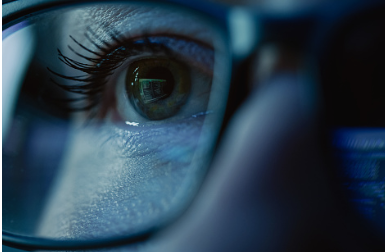 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.


# <div class="alert alert-block alert-info"> <span  style= "font-family: Times New Roman">Image Classification  </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Classify the images with glasses and no glasses using Convolutional Neural Networks  </span> </div>

##  <mark> <span  style= "font-family: Times New Roman">Importing necessary  libraries  </span> </mark>

In [32]:
# Importing necessary libraries from tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import models,layers
from keras.models import Sequential
from keras.layers import Dropout,Activation,Flatten,Dense
# Libraries for Convolutional Layers
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [33]:
# Importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [34]:
# Import path tracing libraries
# glob --> module that matches the pathnames to a specific pattern and directs to it
import glob
import PIL,pathlib

In [35]:
# Import warning libraries
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Import Computer vision libraries
import cv2
import os

In [37]:
# Lets create a named path for re-using it.
# Lets also create two classes for segregating both sets of images.
directory = r"C:\Users\Admin\Downloads\glasses\glasses"
# categories - list of both labels
categories = ['glasses','no_glasses']

##  <mark> <span  style= "font-family: Times New Roman">Load and Display image  </span> </mark>

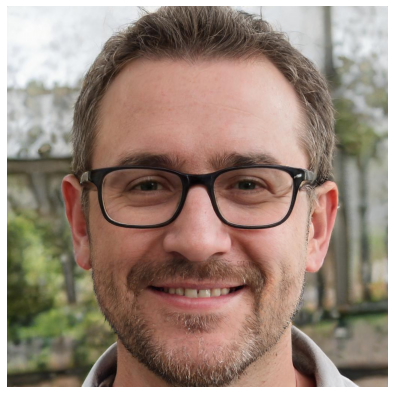

In [38]:
# Lets see how we can load an image from the directory
# Here, we are not reducing the quality of image

# Image size definition and reading 1 image
plt.figure(1,figsize=(15,7))

# From both the categories
for category in categories:
    # From both the paths where data is present
    # Here we conveniently defined the category names such that it matches with the directory
    path = os.path.join(directory,category)
    # For every image in the directory
    for img in os.listdir(path):
        # reading the image and array is stored in the img_array variable
        img_array = cv2.imread(os.path.join(path,img))
        # image is converted into rgb color format as the default image features blue colored
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        # Show image
        plt.imshow(img_array)
        # Switching off the axis
        plt.axis('off')
        plt.show()
        break
    break

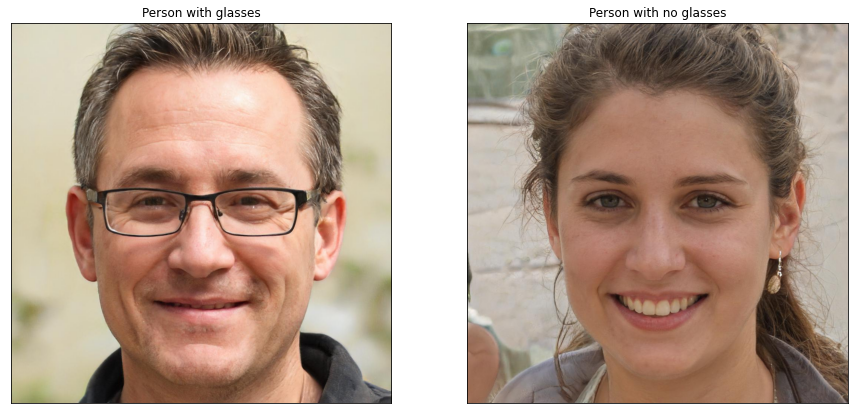

In [39]:
# Visualize the sample images of both the classes with rgb patterns
# retrieving both the images from both classes
glass_pic = r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-1815.jpg'
no_glass_pic = r'C:\Users\Admin\Downloads\glasses\glasses\no_glasses\face-541.jpg'

# Figure size definition
plt.figure(figsize=(15,7))
# Defining subplots 1 row and 2 columns; side by side display for first image
plt.subplot(1,2,1)
# Reading first image
img_array = cv2.imread(glass_pic)
# Convert the image to color image
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
# Show the image
plt.imshow(img_array)
# Display the title of the image
plt.title('Person with glasses')
# Empty ticks - No tick locations or labels of axis
plt.xticks([]), plt.yticks([])


# Defining subplots 1 row and 2 columns; side by side display for second image
plt.subplot(1,2,2)
# Reading second image
img_array_1 = cv2.imread(no_glass_pic)
# Convert the image to color image
img_array_1 = cv2.cvtColor(img_array_1,cv2.COLOR_BGR2RGB)
# Show the image
plt.imshow(img_array_1)
# Display the title of the image
plt.title('Person with no glasses')
# Empty ticks - No tick locations or labels of axis
plt.xticks([]), plt.yticks([])

plt.show()

In [40]:
# Format of current image array
print(img_array[1])

[[213 210 191]
 [213 210 191]
 [214 211 192]
 ...
 [216 210 188]
 [212 206 184]
 [208 202 180]]


In [41]:
# Lets see the size of the image
print(img_array.shape)

(1024, 1024, 3)


##  <mark> <span  style= "font-family: Times New Roman">Merging images from both the classes into a single list  </span> </mark>

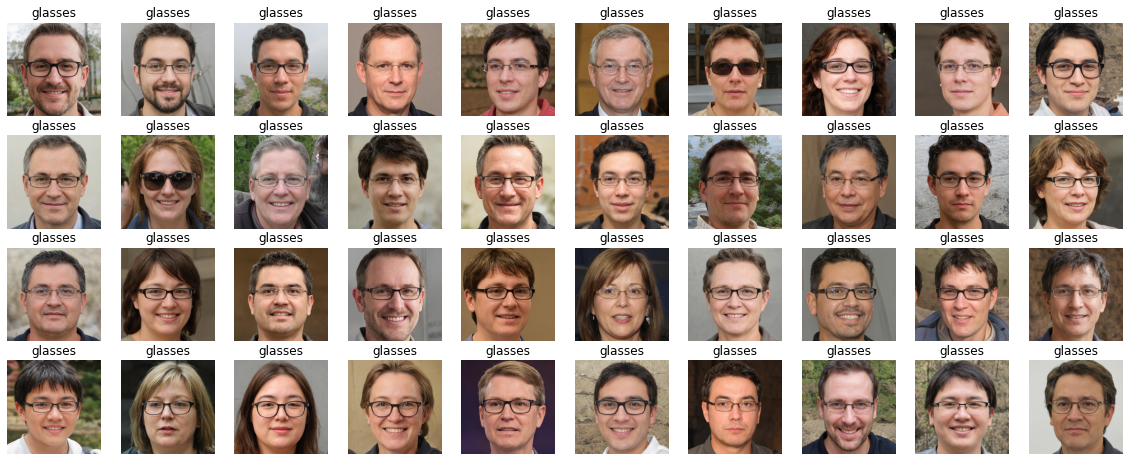

In [42]:
# Create an empty list 'images'
images = []

# Get every image from glasses folder to images array using glob
for img_path in glob.glob(r"C:/Users/Admin/Downloads/glasses/glasses/glasses/*"):
    # Append every output image array after reading to this list
    images.append(mpimg.imread(img_path))

# Lets display a set of images from the list, Lets say 40 images
images_to_display = images[:40]
# Defining the plot size
plt.figure(figsize=(20,10))
# Set the images into matrix mode; defining the no of columns to arrange the images
columns = 10
# For every image index and the image
for i,image in enumerate(images_to_display):
    # Rows and columns for the images are 
    plt.subplot(int(len(images_to_display)/columns) +1,columns,i+1)
    # No axis display
    plt.axis('off')
    # Show the image
    plt.imshow(image)
    # Display category
    plt.title('glasses')

In [43]:
# Lets check the shape of the list and the image details
# No of images in the list
print(len(images)) 
# Each image size
print(len(images[0]),len(images[0][0]),len(images[0][0][0]))

60
1024 1024 3


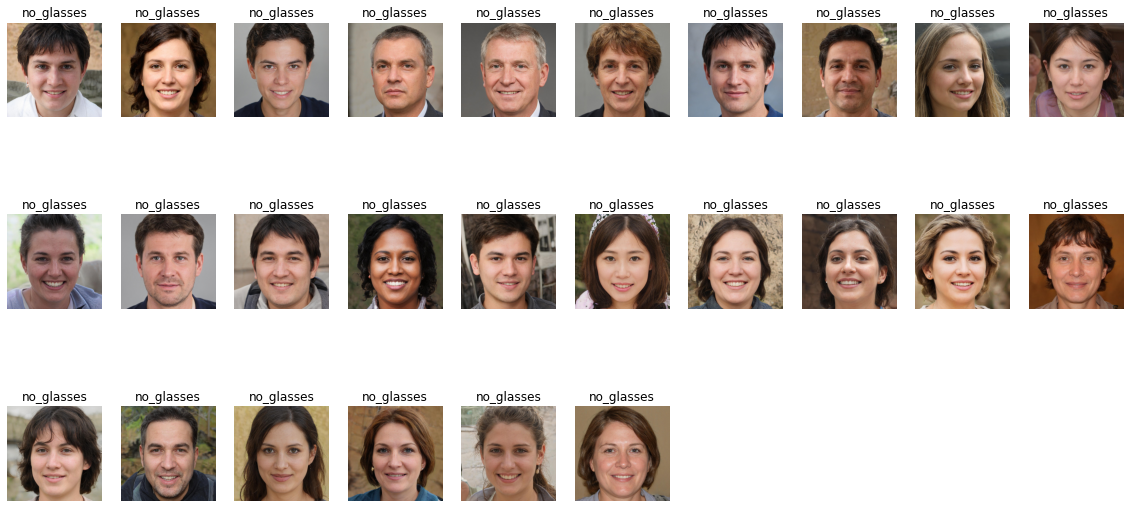

In [44]:
# Lets add the no_glasses image arrays to the images array

# Get every image from no_glasses folder to images array using glob
for img_path in glob.glob(r"C:/Users/Admin/Downloads/glasses/glasses/no_glasses/*"):
    # Append every output image array after reading to this list
    images.append(mpimg.imread(img_path))

# Lets display a set of images from the list, all no_glasses images
images_to_display = images[60::]
# Defining the plot size
plt.figure(figsize=(20,10))
# Set the images into matrix mode; defining the no of columns to arrange the images
columns = 10
# For every image index and the image
for i,image in enumerate(images_to_display):
    # Rows and columns for the images are 
    plt.subplot(int(len(images_to_display)/columns) +1,columns,i+1)
    # No axis display
    plt.axis('off')
    # Show the image
    plt.imshow(image)
    # Display category
    plt.title('no_glasses')

In [45]:
# Lets check the shape of the list and the image details
# No of images in the list
print(len(images)) 
# Each image size
print(len(images[0]),len(images[0][0]),len(images[0][0][0]))

86
1024 1024 3


In [46]:
# Lets save the path or directory of the images
path_dir = pathlib.Path(r"C:/Users/Admin/Downloads/glasses/glasses/")

# Creating Dict for storing path and labels
faces = {'glasses':list(path_dir.glob('glasses/*.jpg')),'no_glasses':list(path_dir.glob('no_glasses/*.jpg'))}
face_labels = {'glasses':0,'no_glasses':1}

##  <mark> <span  style= "font-family: Times New Roman">Reduce the Image size  </span> </mark>

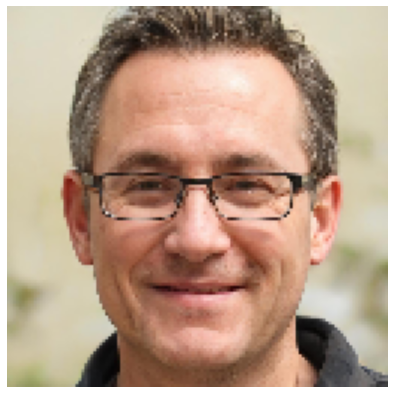

In [47]:
# Reduce the image size from 1024,1024,3 --> 128,128,3
# Lets do this with a sample image
image_size=128
# Defining the figure size and 1 image
plt.figure(1,figsize=(15,7))
# Read the image into the new_array
new_array = cv2.resize(img_array,(image_size,image_size))
plt.imshow(new_array)
plt.axis('off')
plt.show()

In [48]:
# Lets assemble all the tasks from the start in a single function
# Create one more list data and assign all the labels to them simultaneously

# Create an empty list 'data'
data = []

def create_data():
    # For every category 
    for category in categories:
        # Joining the path
        path = os.path.join(directory,category)
        # Label numbers glasses or no glasses --> 0 or 1
        class_number = categories.index(category) 
        # For every image in the path
        for img in os.listdir(path):
            # Task start
            try:
                # Read image
                img_array = cv2.imread(os.path.join(path,img))
                # Convert image to rgb image
                img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
                # Resize it to image size as done earlier
                new_array = cv2.resize(img_array,(image_size,image_size))
                # Append it to the empty list 'data'
                data.append([new_array,class_number])
            # If there is no exception :
            except Exception as e:
                pass
# Call the function
create_data()

In [49]:
type(data)

list

In [50]:
print(len(data))

86


In [51]:
# So that now we have sequential set of images, Lets shuffle them
import random
random.shuffle(data)

In [52]:
# Now we have two features in data list: 
# 1 --> Image data array
# 2 --> Image label

# For five elements in data list
for j in data[:5]:
    # these are labels after shuffling
    print(j[1])

0
0
0
0
0


##  <mark> <span  style= "font-family: Times New Roman">Data preprocessing </span> </mark>

In [53]:
# We define a function for plotting for feasibility, so that always reading is not required
def plot_image(data,index):
    # Image size definition
    plt.figure(figsize=(15,5))
    # Show the image data
    plt.imshow(data[index][0])
    # In xlabel, we define the second feature of the data variable for respective index
    plt.xlabel(categories[data[index][1]])
    plt.show()

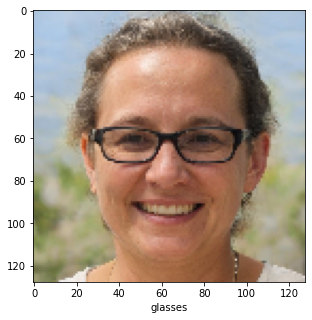

In [54]:
plot_image(data,2)

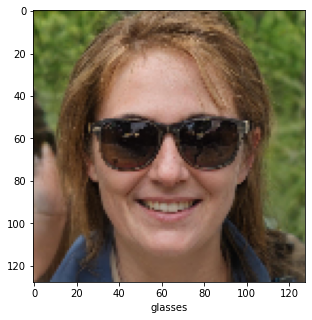

In [55]:
plot_image(data,36)

In [56]:
# Divide x,y to array and labels to easy access of variables.

# Create X,y empty lists:
X = [] ; y = []

for features,label in data:
    # Append column-1 to the X list
    X.append(features)
    # Append column-2 to the y list
    y.append(label)
    
# Convert the X,y lists to numpy array
X = np.array(X)
y = np.array(y)

print(X.shape,y.shape)

(86, 128, 128, 3) (86,)


In [57]:
# Saving the path of images 
path_dir = pathlib.Path(r"C:\Users\Admin\Downloads\glasses\glasses")

In [58]:
# Creating Dict for storing paths and labels
faces = {'with_glasses':list(path_dir.glob('glasses/*.jpg')), 'with_out_glasses':list(path_dir.glob('no_glasses/*.jpg'))}
face_labels = {'with_glasses':0,'with_out_glasses':1}

In [59]:
# creating empty list
X, y = [],[]

# Writting a for loop for convetting img to array and resizing and saving to in X and according to that label willbe saved in y
for face, images in faces.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(face_labels[face])

In [60]:
# Convertting X & y to np array
X=np.array(X)
y=np.array(y)

In [61]:
# Split the data into train_data, validation_data and test_data
# Train_data --> 80% ; Validation_data -->10% ; Test_Data -->10%

from sklearn.model_selection import train_test_split
# Dividing train and remaining data split
X_train, X_rem, y_train, y_rem = train_test_split(X,y,train_size=0.8)

# Lets divide the remaining data into validation and test data
X_val,X_test,y_val,y_test = train_test_split(X_rem,y_rem,test_size=0.5)

# Print all sets data sizes
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)


(68, 224, 224, 3) (68,)
(9, 224, 224, 3) (9,)
(9, 224, 224, 3) (9,)


In [62]:
# Scaling
X_train_scaled = X_train/ 255
X_val_scaled = X_val/255
X_test_scaled = X_test/ 255

##  <mark> <span  style= "font-family: Times New Roman">Model Building </span> </mark>

In [457]:
# Creating a Convolutional Neural Network model from here

# Defining a model, Sequential --> A plain stack of layers where each layer has one input tensor and one output tensor 
model = Sequential()
# Adding a CNN layer with 32 filters and (3,3) kernel function and input features as defined
model.add(Conv2D(32,(3,3),input_shape=(128,128,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding one more Convolutional Neural Network Layer
# Adding a CNN layer with 32 filters and (3,3) kernel function
model.add(Conv2D(32,(3,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding one more Convolutional Neural Network Layer
# Adding a CNN layer with 64 filters and (3,3) kernel function
model.add(Conv2D(64,(3,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model.add(MaxPooling2D(pool_size=(2,2)))

In [458]:
# Lets convert our 3D feature maps to 1D feature vectors
# Flatten the 3D vector
model.add(Flatten())
# Adding a dense layer
# Dense layer --> Performs the dot product to the input (output of previous layer) and kernel, applies activation to it.
# ...It then adds bias to it to update weights, Bias is added to update the preference status of a node
model.add(Dense(64))
# Activation for the dense layer
model.add(Activation('relu'))
# Adding a dropout layer to reduce overfitting
# Dropout layer randomly sets input values to 0 at a given rate and sets the rest to (1/(1-rate)) scaling them up
model.add(Dropout(0.5))
# 50% of points are set to 0 and other 50% are doubled up to update the changes and reduce overfitting
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Final compiling the model
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [459]:
# Fitting the model
model.fit(X,y,epochs=10,validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 5s 912ms/step - loss: 123.7483 - accuracy: 0.5714 - val_loss: 68.6549 - val_accuracy: 0.1111
Epoch 2/10
3/3 [==============================] - 2s 488ms/step - loss: 26.0053 - accuracy: 0.4675 - val_loss: 1.4094 - val_accuracy: 0.1111
Epoch 3/10
3/3 [==============================] - 2s 491ms/step - loss: 0.8872 - accuracy: 0.4675 - val_loss: 0.5104 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 503ms/step - loss: 0.6457 - accuracy: 0.6234 - val_loss: 0.6091 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 2s 538ms/step - loss: 0.5848 - accuracy: 0.6883 - val_loss: 0.4456 - val_accuracy: 0.8889
Epoch 6/10
3/3 [==============================] - 2s 640ms/step - loss: 0.5136 - accuracy: 0.7273 - val_loss: 0.8915 - val_accuracy: 0.4444
Epoch 7/10
3/3 [==============================] - 2s 538ms/step - loss: 0.5889 - accuracy: 0.6883 - val_loss: 0.3272 - val_accuracy: 0.8889
Epoch 8/10
3/3 [

##  <mark> <span  style= "font-family: Times New Roman">Data Augmentation </span> </mark>

**The data that is given as input to the model might be insufficient for the model to produce high accuracy. Lets augment the data in all the possible ways possible**

- Whenever there is no enough data, we augment the data thereby increasing accuracy, reducing the overfitting 
- We use basic image transformation - Crop,flip,filter(burning and sharpening),change color, add noise, transform image
- We can add noise by changing it to black and white or by adding gaussian noise
- Change in texture, clarity and saturation bring more chances to augment data
- Using Lenet-5, distortions like scaling, squeezing, horizontal shearing can be done
- Using ImageNet, Horizontal reflections can be done
- Using U-Net, grey value variation, if its color saturation cna be done.

In [97]:
data_Aug = keras.Sequential([
    # This is for random zoom
    layers.experimental.preprocessing.RandomZoom(0.5),
    # This is for random Contrast
    layers.experimental.preprocessing.RandomContrast(0.6),
    # This is for random Flip
    layers.experimental.preprocessing.RandomFlip(mode= "horizontal"),])

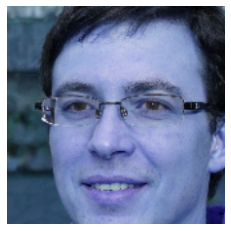

In [98]:
plt.axis('off')
plt.imshow(data_Aug(X)[4].numpy().astype("uint8"))

In [99]:
# Lets see the Various augmentation techniques for a sample image

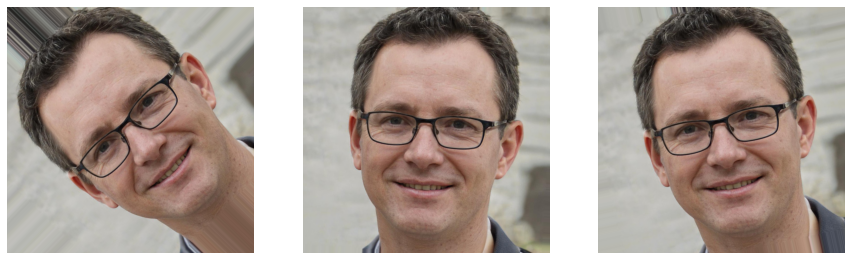

In [100]:
# Rotation of the image
datagen = ImageDataGenerator(rotation_range=50,fill_mode='nearest')

# Image read
img_sample = mpimg.imread(r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-973.jpg')
# Image Reshape
img_sample = img_sample.reshape((1,1024,1024,3))
# Data augmentation iteration
aug_iter = datagen.flow(img_sample,batch_size=1)
# Plot as subplots
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# Show all the rotated images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

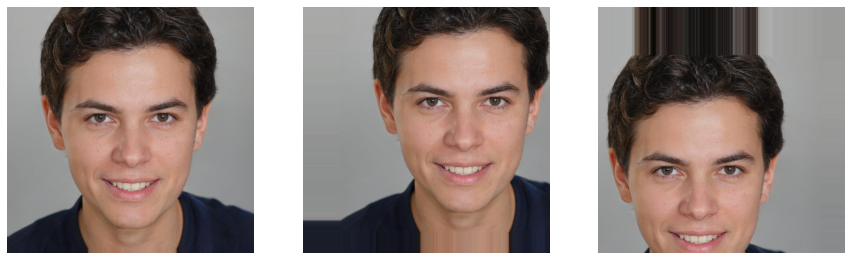

In [101]:
# width shift and height shift of the image
datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

# Image read
img_sample = mpimg.imread(r'C:\Users\Admin\Downloads\glasses\glasses\no_glasses\face-1060.jpg')
# Image Reshape
img_sample = img_sample.reshape((1,1024,1024,3))
# Data augmentation iteration
aug_iter = datagen.flow(img_sample,batch_size=1)
# Plot as subplots
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# Show all the shifted images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

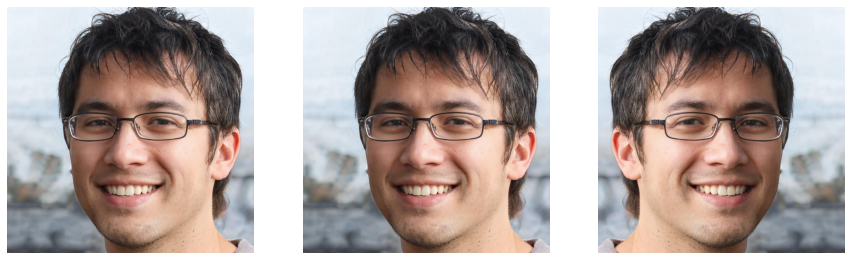

In [102]:
# Flipping of the image
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=False)

# Image read
img_sample = mpimg.imread(r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-3788.jpg')
# Image Reshape
img_sample = img_sample.reshape((1,1024,1024,3))
# Data augmentation iteration
aug_iter = datagen.flow(img_sample,batch_size=1)
# Plot as subplots
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# Show all the flipped images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

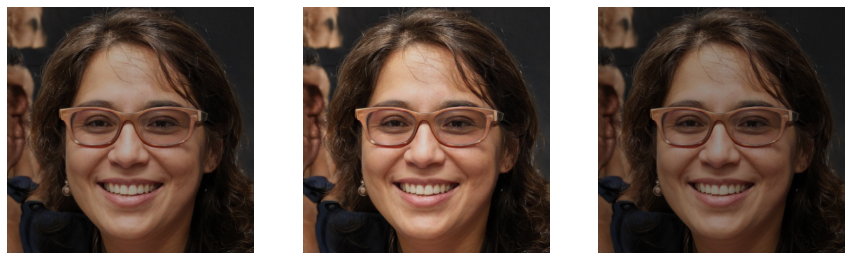

In [103]:
# Brightness change of the image
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

# Image read
img_sample = mpimg.imread(r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-4628.jpg')
# Image Reshape
img_sample = img_sample.reshape((1,1024,1024,3))
# Data augmentation iteration
aug_iter = datagen.flow(img_sample,batch_size=1)
# Plot as subplots
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# Show all the images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

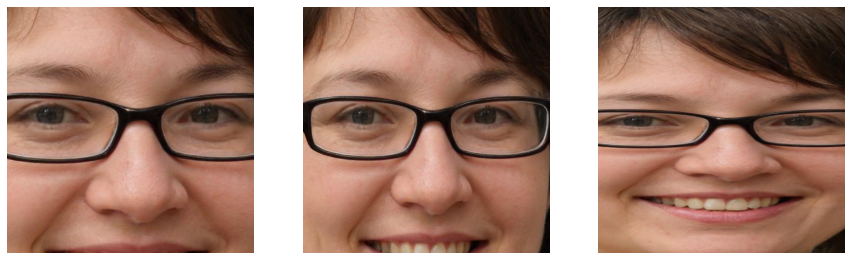

In [104]:
# Zooming Image
datagen = ImageDataGenerator(zoom_range=[0.3,0.8])

# Image read
img_sample = mpimg.imread(r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-2208.jpg')
# Image Reshape
img_sample = img_sample.reshape((1,1024,1024,3))
# Data augmentation iteration
aug_iter = datagen.flow(img_sample,batch_size=1)
# Plot as subplots
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# Show all the zoomed images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

In [105]:
# Histogram Equalization
# Adaptive Equalization
# Contrast Stretching

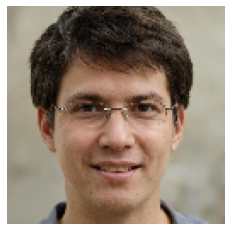

In [106]:
# Selecting an image
img = tensorflow.keras.preprocessing.image.load_img(r'C:\Users\Admin\Downloads\glasses\glasses\glasses\face-175.jpg',target_size=(128,128,3))
# Image show
plt.imshow(img)
plt.axis('off')
plt.show()

In [107]:
from tensorflow.keras.preprocessing import image
# Rotation, shearing, zoom, flipping, width_shift, height_shift, brightness_changes are done. 
# Combining all transformations shown earlier
datagen = ImageDataGenerator(rotation_range = 0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, 
                             width_shift_range=0.2, height_shift_range=0.2, brightness_range=[0.2,1.2],validation_split=0.2)

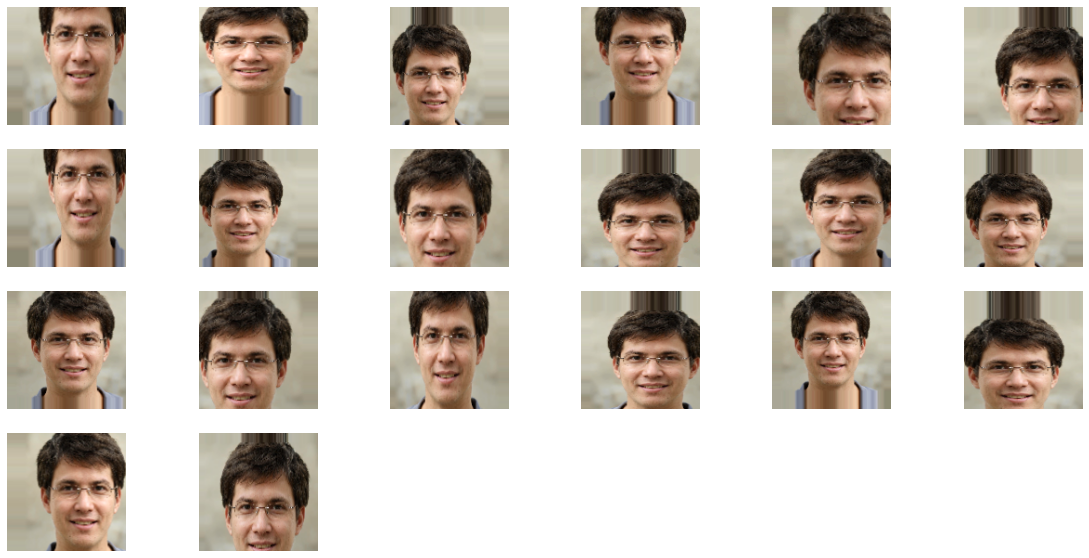

In [109]:
# Lets see the output after the changes: 
transformed_images = []

# Get every image from aug folder to images array using glob
for img_path in glob.glob(r"C:/Users/Admin/Downloads/glasses/glasses/aug/*"):
    # Append every output image array after reading to this list
    transformed_images.append(mpimg.imread(img_path))

# Lets display a set of images from the list, all no_glasses images
transformed_images_to_display = transformed_images[::]
# Defining the plot size
plt.figure(figsize=(20,10))
# Set the images into matrix mode; defining the no of columns to arrange the images
columns = 6
# For every image index and the image
for i,image in enumerate(transformed_images_to_display):
    # Rows and columns for the images are 
    plt.subplot(int(len(transformed_images_to_display)/columns) +1,columns,i+1)
    # No axis display
    plt.axis('off')
    # Show the image
    plt.imshow(image)


**From the above list of images, We can see the transformations applied. First image is the gaussian blurred image**

**We have already done the train test validation split for the data available. Lets check them**

In [110]:
y_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0])

In [111]:
y_val

array([1, 0, 0, 1, 0, 0, 1, 0, 0])

In [112]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0])

In [113]:
# Lets scale the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_val_scaled = X_val/255

In [114]:
# Resizing as a part of Augmentation
IMG_SIZE = 128
resize_and_rescale = tensorflow.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),layers.Rescaling(1./255)])


In [115]:
data_augmentation = tensorflow.keras.Sequential([layers.RandomFlip("horizontal"),
                                         layers.RandomRotation(0.2),
                                         layers.RandomContrast(0.6),
                                         layers.RandomZoom(0.4),])

In [146]:
# Creating a Convolutional Neural Network model from here

# Defining a model, Sequential --> A plain stack of layers where each layer has one input tensor and one output tensor 
model1 = Sequential()
model1.add(resize_and_rescale)
model1.add(data_augmentation)
# Adding a CNN layer with 32 filters and (3,3) kernel function and input features as defined
model1.add(Conv2D(32,(3,3),input_shape=(128,128,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model1.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model1.add(MaxPooling2D(pool_size=(2,2)))

# Adding one more Convolutional Neural Network Layer
# Adding a CNN layer with 32 filters and (3,3) kernel function
model1.add(Conv2D(32,(3,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model1.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model1.add(MaxPooling2D(pool_size=(2,2)))

# Adding one more Convolutional Neural Network Layer
# Adding a CNN layer with 64 filters and (3,3) kernel function
model1.add(Conv2D(64,(3,3)))
# Activation function --> 'Relu' --> Rectified Linear Unit
model1.add(Activation('relu'))
# Adding a MaxPooling layer to reduce the size and preference of high intense pixels from every (2,2) pixels
model1.add(MaxPooling2D(pool_size=(2,2)))

In [147]:
# Lets convert our 3D feature maps to 1D feature vectors
# Flatten the 3D vector
model1.add(Flatten())
# Adding a dense layer
# Dense layer --> Performs the dot product to the input (output of previous layer) and kernel, applies activation to it.
# ...It then adds bias to it to update weights, Bias is added to update the preference status of a node
model1.add(Dense(64))
# Activation for the dense layer
model1.add(Activation('relu'))
# Adding a dropout layer to reduce overfitting
# Dropout layer randomly sets input values to 0 at a given rate and sets the rest to (1/(1-rate)) scaling them up
model1.add(Dropout(0.5))
# 50% of points are set to 0 and other 50% are doubled up to update the changes and reduce overfitting
model1.add(Dense(32))
# Activation for the dense layer
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# Final compiling the model
model1.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

In [148]:
history = model1.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
3/3 [==============================] - 16s 458ms/step - loss: 0.6920 - accuracy: 0.5735
Epoch 2/25
3/3 [==============================] - 2s 468ms/step - loss: 0.6428 - accuracy: 0.7059
Epoch 3/25
3/3 [==============================] - 2s 508ms/step - loss: 0.6462 - accuracy: 0.7059
Epoch 4/25
3/3 [==============================] - 2s 399ms/step - loss: 0.6746 - accuracy: 0.7206
Epoch 5/25
3/3 [==============================] - 2s 405ms/step - loss: 0.6322 - accuracy: 0.6765
Epoch 6/25
3/3 [==============================] - 1s 324ms/step - loss: 0.6425 - accuracy: 0.6912
Epoch 7/25
3/3 [==============================] - 2s 433ms/step - loss: 0.6531 - accuracy: 0.6471
Epoch 8/25
3/3 [==============================] - 2s 422ms/step - loss: 0.6680 - accuracy: 0.7059
Epoch 9/25
3/3 [==============================] - 2s 407ms/step - loss: 0.6282 - accuracy: 0.7206
Epoch 10/25
3/3 [==============================] - 1s 413ms/step - loss: 0.6537 - accuracy: 0.6765
Epoch 11/25
3/3 [=

In [149]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        9248      
                                                      

In [150]:
history_dict = model1.history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


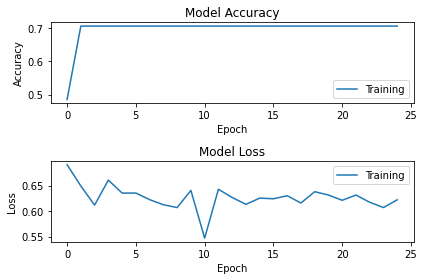

In [126]:
 
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(model1.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(model1.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper right')

plt.tight_layout()

plt.show()

In [127]:
from keras.utils import load_img
image = load_img(r'C:/Users/admin/Downloads/glasses/glasses/no_glasses/face-4202.jpg',target_size=(128,128,3))
img = np.array(image)
img = img/255.0
img = img.reshape(1,128,128,3)
label = model.predict(img)

1/1 [==============================] - 0s 221ms/step


There are no glasses


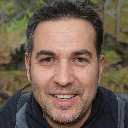

In [128]:
if label[0][0]<0.5:
    print('There are no glasses')
else:
    print('There are glasses')
    
image

## Implementation of second model

In [144]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator ## read the data from folders.

In [151]:
# Now, the data is split. Lets save the train data and test data seperately in their folders
count = 0
for i in X_train:
    image = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    cv2.imwrite(r'C:\Users\Admin\Downloads\glasses\glasses\train\train_'+str(count)+'.jpg',image) 
    count+=1
    
count = 0
for i in X_val:
    image = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    cv2.imwrite(r'C:\Users\Admin\Downloads\glasses\glasses\validation\validation_'+str(count)+'.jpg',image) 
    count+=1
    
count = 0
for i in X_test:
    image = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    cv2.imwrite(r'C:\Users\Admin\Downloads\glasses\glasses\test\test_'+str(count)+'.jpg',image) 
    count+=1

In [152]:
# Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [153]:
training_set = train_datagen.flow_from_directory(r'C:\Users\Admin\Downloads\glasses\glasses\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\Admin\Downloads\glasses\glasses\validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 68 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [194]:
#  Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
#  Pooling 2nd time
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 6 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [195]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 32)       

In [196]:
# - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
3/3 [==============================] - 1s 296ms/step - loss: 0.6174 - accuracy: 0.6765 - val_loss: 0.6986 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 0s 173ms/step - loss: 0.6254 - accuracy: 0.7059 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 0s 113ms/step - loss: 0.5997 - accuracy: 0.7059 - val_loss: 0.6377 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 0s 190ms/step - loss: 0.5989 - accuracy: 0.7059 - val_loss: 0.6484 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 0s 111ms/step - loss: 0.5919 - accuracy: 0.7059 - val_loss: 0.6636 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 0s 194ms/step - loss: 0.6031 - accuracy: 0.7059 - val_loss: 0.6338 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 109ms/step - loss: 0.5999 - accuracy: 0.7059 - val_loss: 0.6350 - val_accuracy: 0.6667
Epoch 8/20
3/3 [====

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('model_glasses.h5')

In [165]:
from tensorflow.keras.models import load_model
 
# load model
model_new = load_model('model_glasses.h5')

In [166]:
model_new.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 32)        

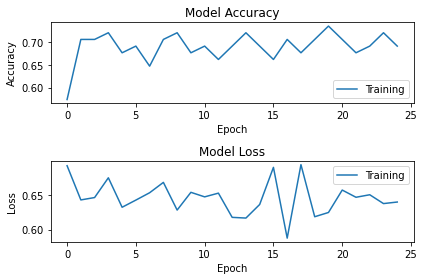

In [168]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(model1.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(model1.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper right')

plt.tight_layout()

plt.show()

In [178]:
# Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Admin\Downloads\glasses\glasses\test\no_glasses\test_6.jpg', target_size = (64,64))
test_imag = image.img_to_array(test_image)
test_imag = test_imag/255
test_imag = np.expand_dims(test_imag, axis = 0)
result = cnn.predict(test_imag)

1/1 [==============================] - 0s 38ms/step


In [179]:
result

array([[0.9017637]], dtype=float32)

The image has no glasses


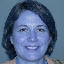

In [182]:
if result[0]<=0.5:
    print("The image has glasses")
else:
    print("The image has no glasses")

test_image

In [183]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Admin\Downloads\glasses\glasses\test\glasses\test_0.jpg', target_size = (64,64))
test_imag = image.img_to_array(test_image)
test_imag = test_imag/255
test_imag = np.expand_dims(test_imag, axis = 0)
result = cnn.predict(test_imag)

1/1 [==============================] - 0s 53ms/step


In [184]:
result

array([[1.8769999e-06]], dtype=float32)

The image has glasses


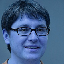

In [185]:
if result[0]<=0.5:
    print("The image has glasses")
else:
    print("The image has no glasses")

test_image